# 数据清洗

保留所需字段，并筛选出 lad20cd 字段前三位是“E09”的数据（London范围）

In [ ]:
# import pandas as pd

# # read CSV
# df = pd.read_csv(r"F:\a\zoopla-data-gen2-rent-valid-property-id-year-2017.csv")

# # keep required fields
# fields = [
#     "property_id", "listing_id", "property_type", "category", "zoopla_year", "start_date", "end_date", "duration",
#     "price_unique", "price_first", "price_last", "price_min", "price_max", "price_flag",
#     "num_bed_max", "num_floors_max", "num_bathrooms_max", "num_receptions_max", "pcu",
#     "latitude", "longitude", "lad20cd", "lad20nm"
# ]
# df = df[fields]

# # filter data with lad20cd field starts with "E09"
# df_london = df[df["lad20cd"].astype(str).str[:3] == "E09"]

# # save to new CSV file
# df_london.to_csv(r"F:\a\zoopla-rent-valid-property-london-2017.csv", index=False, encoding="utf-8-sig")

清理和房价相关的数据字段。选择 price_last 作为房价，将多次出现的房产进行归一化，选取最后一次上架的price_last，保证每年每个房产都是唯一的。
同时清理所需字段

In [3]:
import pandas as pd
import os

# --- 1. 设置文件路径和参数 ---
base_path = r"F:\a"
output_file = os.path.join(base_path, "zoopla-rent-valid-property-london-common-sample.csv")
years = range(2017, 2025)  # 2017 到 2024

# 指定需要提取的字段
fields_to_keep = [
    "property_id", "listing_id", "property_type", "category",
    "zoopla_year", "price_last", "num_bed_max", "num_floors_max",
    "num_bathrooms_max", "num_receptions_max", "pcu",
    "latitude", "longitude", "lad20cd", "lad20nm"
]

processed_dataframes = []  # 存储每年处理后的数据
property_ids_per_year = {}  # 存储每年的唯一 property_id

print("开始处理 Zoopla 年度数据...")

# --- 2. 循环读取并处理每年的文件 ---
for year in years:
    file_path = os.path.join(base_path, f"zoopla-rent-valid-property-london-{year}.csv")

    if not os.path.exists(file_path):
        print(f"警告: 文件 {file_path} 未找到，已跳过。")
        continue

    print(f"\n处理年份: {year}")

    # 读取 CSV
    df = pd.read_csv(file_path, usecols=fields_to_keep)
    print(f"  - 读取 {len(df)} 条原始记录。")

    # 去掉重复项, 仅保留最后一次出现的记录
    df.drop_duplicates(subset=["property_id"], keep='last', inplace=True)
    print(f"  - 去重后剩余 {len(df)} 条唯一挂牌记录。")

    # 存储处理后的数据和当年的 property_id 集合
    processed_dataframes.append(df)
    property_ids_per_year[year] = set(df['property_id'].unique())

# --- 3. 合并去重后的所有数据，得到大样本池 ---
print("\n将所有年份的独立挂牌记录合并...")
df_full_sample = pd.concat(processed_dataframes, ignore_index=True)
print(f"  - 创建了一个包含 {len(df_full_sample)} 条记录的大样本池。")

# 将 df_full_sample 保存到新的CSV文件
df_full_sample.to_csv(r"F:\a\zoopla-rent-valid-property-london-full-sample.csv", index=False, encoding="utf-8-sig")

# --- 4. 找出在所有年份都存在的 property_id ---
if not property_ids_per_year:
    print("\n错误: 未能成功处理任何文件，程序终止。")
else:
    # 计算所有年份 'property_id' 集合的交集
    common_ids = set.intersection(*property_ids_per_year.values())
    print(f"\n分析完成: 找到了 {len(common_ids)} 个在 {min(years)}-{max(years)} 期间每年都存在的 property_id。")

    if common_ids:
        # --- 4. 合并数据并筛选最终结果 ---
        # 将所有处理过的DataFrame合并成一个
        df_combined = pd.concat(processed_dataframes, ignore_index=True)

        # 筛选出这些共同房产的所有记录
        df_all = df_combined[df_combined['property_id'].isin(common_ids)]

        # 按 property_id 和年份排序，方便查看
        df_all.sort_values(by=['property_id', 'zoopla_year'], inplace=True)
        print(f"  - 筛选出的共同房产总共包含 {len(df_all)} 条记录。")

        # --- 5. 保存结果到新的CSV文件 ---
        df_all.to_csv(output_file, index=False, encoding="utf-8-sig")
        print(f"\n成功！最终数据已保存到文件:\n   {output_file}")
    else:
        print("\nℹ未找到在所有年份都存在的房产，因此不生成输出文件。")

开始处理 Zoopla 年度数据...

处理年份: 2017
  - 读取 571437 条原始记录。
  - 去重后剩余 228157 条唯一挂牌记录。

处理年份: 2018
  - 读取 540521 条原始记录。
  - 去重后剩余 236923 条唯一挂牌记录。

处理年份: 2019
  - 读取 472474 条原始记录。
  - 去重后剩余 226436 条唯一挂牌记录。

处理年份: 2020
  - 读取 495680 条原始记录。
  - 去重后剩余 223329 条唯一挂牌记录。

处理年份: 2021
  - 读取 462668 条原始记录。
  - 去重后剩余 218892 条唯一挂牌记录。

处理年份: 2022
  - 读取 308414 条原始记录。
  - 去重后剩余 170505 条唯一挂牌记录。

处理年份: 2023
  - 读取 268864 条原始记录。
  - 去重后剩余 147840 条唯一挂牌记录。

处理年份: 2024
  - 读取 316505 条原始记录。
  - 去重后剩余 158957 条唯一挂牌记录。

将所有年份的独立挂牌记录合并...
  - 创建了一个包含 1611039 条记录的大样本池。

分析完成: 找到了 8058 个在 2017-2024 期间每年都存在的 property_id。


C:\Users\cihshee\AppData\Local\Temp\ipykernel_76004\374380628.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.sort_values(by=['property_id', 'zoopla_year'], inplace=True)


  - 筛选出的共同房产总共包含 64464 条记录。

成功！最终数据已保存到文件:
   F:\a\zoopla-rent-valid-property-london-common-sample.csv


In [ ]:
# import pandas as pd

# # 读取CSV文件
# df = pd.read_csv(r"F:\a\zoopla-rent-valid-property-london-full-sample.csv")

# # 筛选 zoopla_year 字段值为 2024 的记录
# df_2024 = df[df["zoopla_year"] == 2024]

# # 保存到新的CSV文件
# df_2024.to_csv(r"F:\a\zoopla-rent-valid-property-london-full-sample-2024.csv", index=False, encoding="utf-8-sig")

处理 London 交通站点的坐标，从 British National Grid 转化为经纬度

In [2]:
import pandas as pd
from pyproj import Transformer

# --- 1. 定义文件路径 ---
# 请将这里的路径替换为您包含 X 和 Y 坐标的原始CSV文件
input_file = r"F:\a\stations\Underground_Stations.csv"
output_file = r"F:\a\stations\Underground_Stations_latlon.csv"

# 坐标转换函数
def convert_bng_to_latlon(input_file, output_file):

    try:
        # 读取CSV文件
        df = pd.read_csv(input_file)
        print(f"成功读取文件: {input_file}")

        # 初始化坐标转换器
        # 从 EPSG:27700 (英国国家格网) 转换到 EPSG:4326 (WGS 84 经纬度)
        transformer = Transformer.from_crs("EPSG:27700", "EPSG:4326")

        # 定义转换函数
        def convert_bng_to_latlon(row):
            lat, lon = transformer.transform(row['X'], row['Y'])
            return pd.Series({'latitude': lat, 'longitude': lon})

        print("正在转换坐标...")
        # 将转换后的经纬度数据合并到原数据中
        lat_lon_df = df.apply(convert_bng_to_latlon, axis=1)
        df['latitude'] = lat_lon_df['latitude']
        df['longitude'] = lat_lon_df['longitude']
        
        print("坐标转换完成。")

        # 保存到新的CSV文件
        df.to_csv(output_file, index=False, encoding="utf-8-sig")

        print("\n--- 转换结果预览 (前5行) ---")
        print(df.head())
        print(f"\n处理完毕！包含经纬度的新文件已保存至:\n{output_file}")

    except FileNotFoundError:
        print(f"错误: 文件未找到! 请确认路径是否正确: {input_file}")
    except KeyError as e:
        print(f"错误: {e}")
    except Exception as e:
        print(f"发生未知错误: {e}")


convert_bng_to_latlon(input_file, output_file)

成功读取文件: F:\a\stations\Underground_Stations.csv
正在转换坐标...
坐标转换完成。

--- 转换结果预览 (前5行) ---
             X            Y  OBJECTID           NAME  \
0  532108.3512  181274.1885       111     St. Paul's   
1  536500.7831  182534.4935       112       Mile End   
2  535043.5417  182718.4107       113  Bethnal Green   
3  538367.4374  186075.8536       114         Leyton   
4  540156.7713  188804.0413       115    Snaresbrook   

                                   LINES     ATCOCODE      MODES  \
0                                Central  940GZZLUSPU  bus, tube   
1  District, Hammersmith & City, Central  940GZZLUMED  bus, tube   
2                                Central  940GZZLUBLG  bus, tube   
3                                Central  940GZZLULYN  bus, tube   
4                                Central  940GZZLUSNB  bus, tube   

                             ACCESSIBILITY NIGHT_TUBE             NETWORK  \
0                           Not Accessible        Yes  London Underground   
1  Partially 

# Data analysis

## Analysis of full samples between 2017 and 2024

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

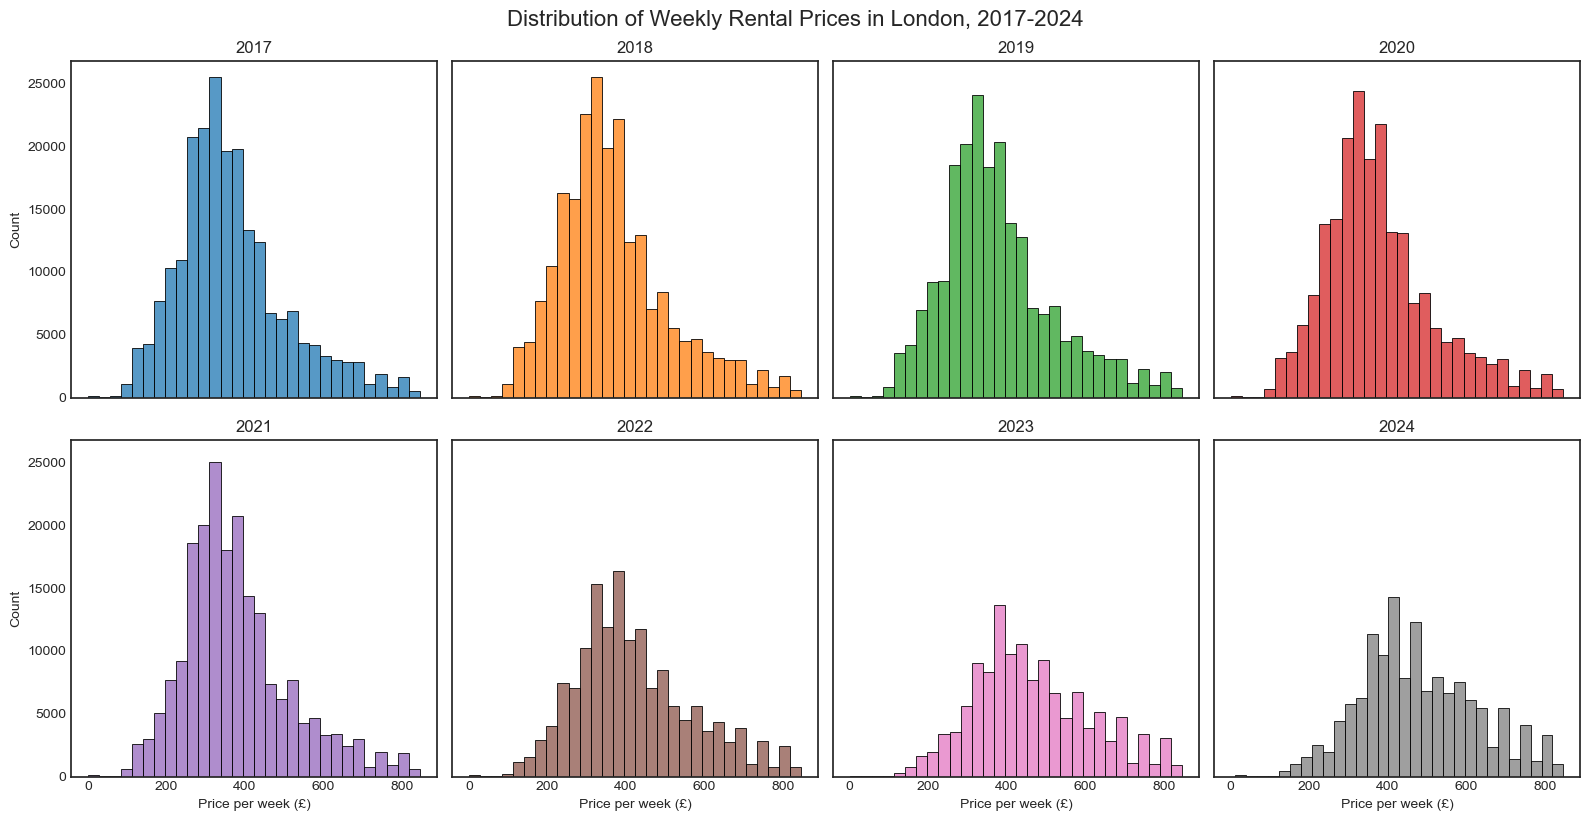

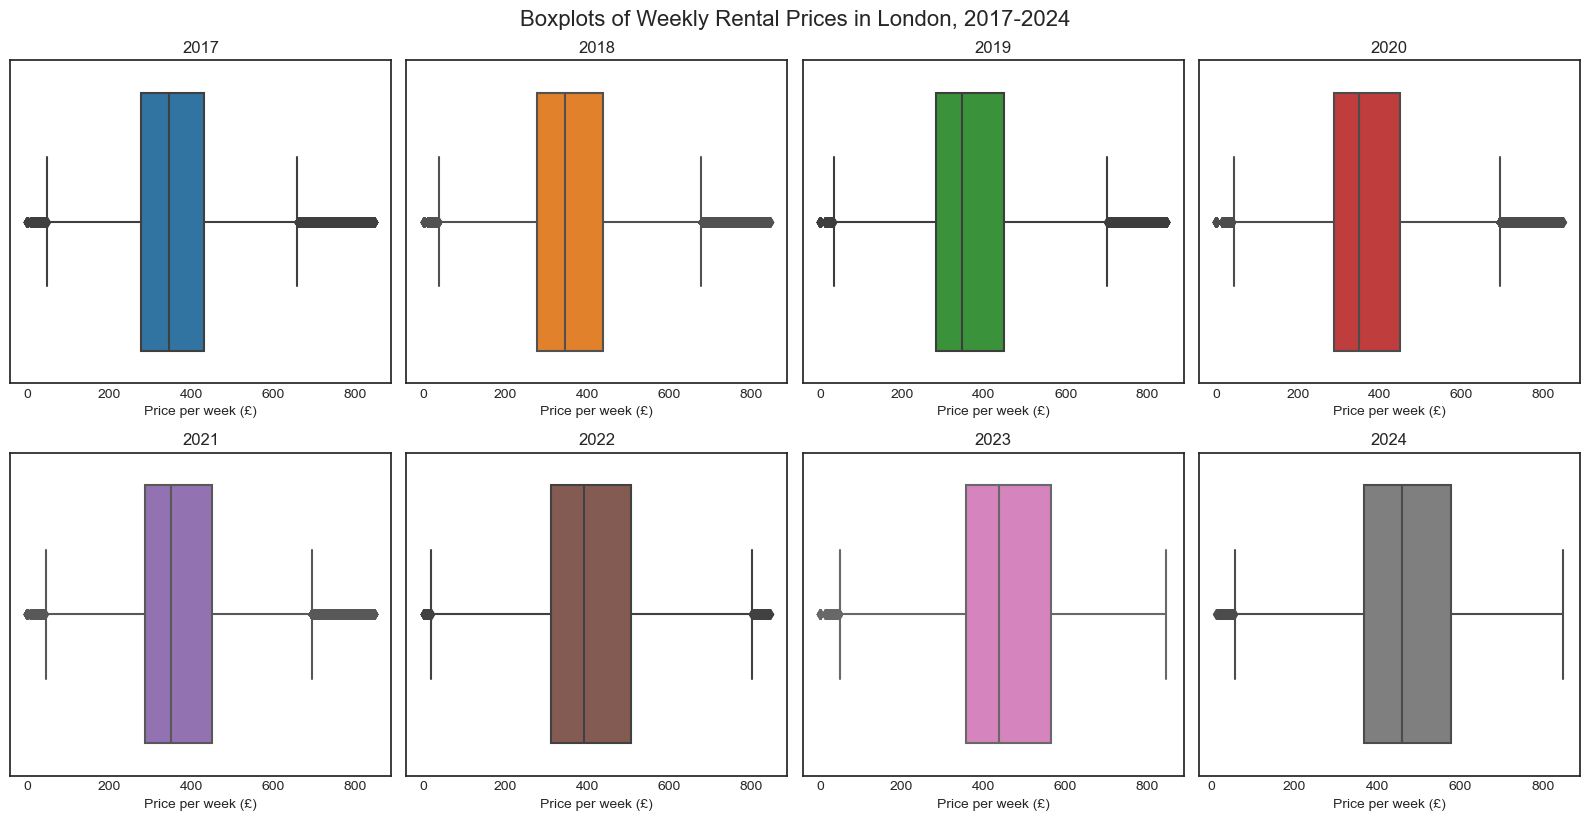

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read data and filter for years 2017–2024
path = r"F:\a\zoopla-rent-valid-property-london-full-sample.csv"
df = pd.read_csv(path, encoding="utf-8-sig")
df = df[df['zoopla_year'].between(2017, 2024)]

# 2. IQR: Any data point exceeding the upper quartile (Q3) plus 1.5 times the interquartile range (IQR) is considered an outlier.
q1 = df['price_last'].quantile(0.25)
q3 = df['price_last'].quantile(0.75)
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
df_trim = df[(df['price_last']>=lower)&(df['price_last']<=upper)]

# 4. Setup plotting parameters
years = list(range(2017, 2025))  # [2017, 2018, ..., 2024]
n_years = len(years)
ncols = 4
nrows = (n_years + ncols - 1) // ncols

palette = sns.color_palette("tab10", n_years)
# palette is a list: palette[0] is 2017, palette[1] is 2018, …

# A. Yearly histograms with consistent colors
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8), sharex=True, sharey=True)
axes = axes.flatten()
for i, yr in enumerate(years):
    ax = axes[i]
    data = df_trim.loc[df_trim['zoopla_year'] == yr, 'price_last']
    sns.histplot(data, bins=30, ax=ax, color=palette[i])
    ax.set_title(f"{yr}") # MODIFIED: Simplified subplot title to just the year
    ax.set_xlabel("Price per week (£)")
    ax.set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
# MODIFIED: Updated the main title to be more academic.
# Note: Figure numbering (e.g., "Figure 1.") is best added in your document (Word/LaTeX), not hardcoded here.
fig.suptitle("Distribution of Weekly Rental Prices in London, 2017-2024", fontsize=16, y=1.02)
plt.show()


# B. Boxplot for each year
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i, yr in enumerate(years):
    ax = axes[i]
    data = df_trim.loc[df_trim['zoopla_year'] == yr, 'price_last']
    sns.boxplot(x=data, ax=ax, color=palette[i])
    ax.set_title(f"{yr}") # MODIFIED: Simplified subplot title for consistency
    ax.set_xlabel("Price per week (£)")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
# MODIFIED: Updated the main title for academic consistency.
fig.suptitle("Boxplots of Weekly Rental Prices in London, 2017-2024", fontsize=16, y=1.02)
plt.show()

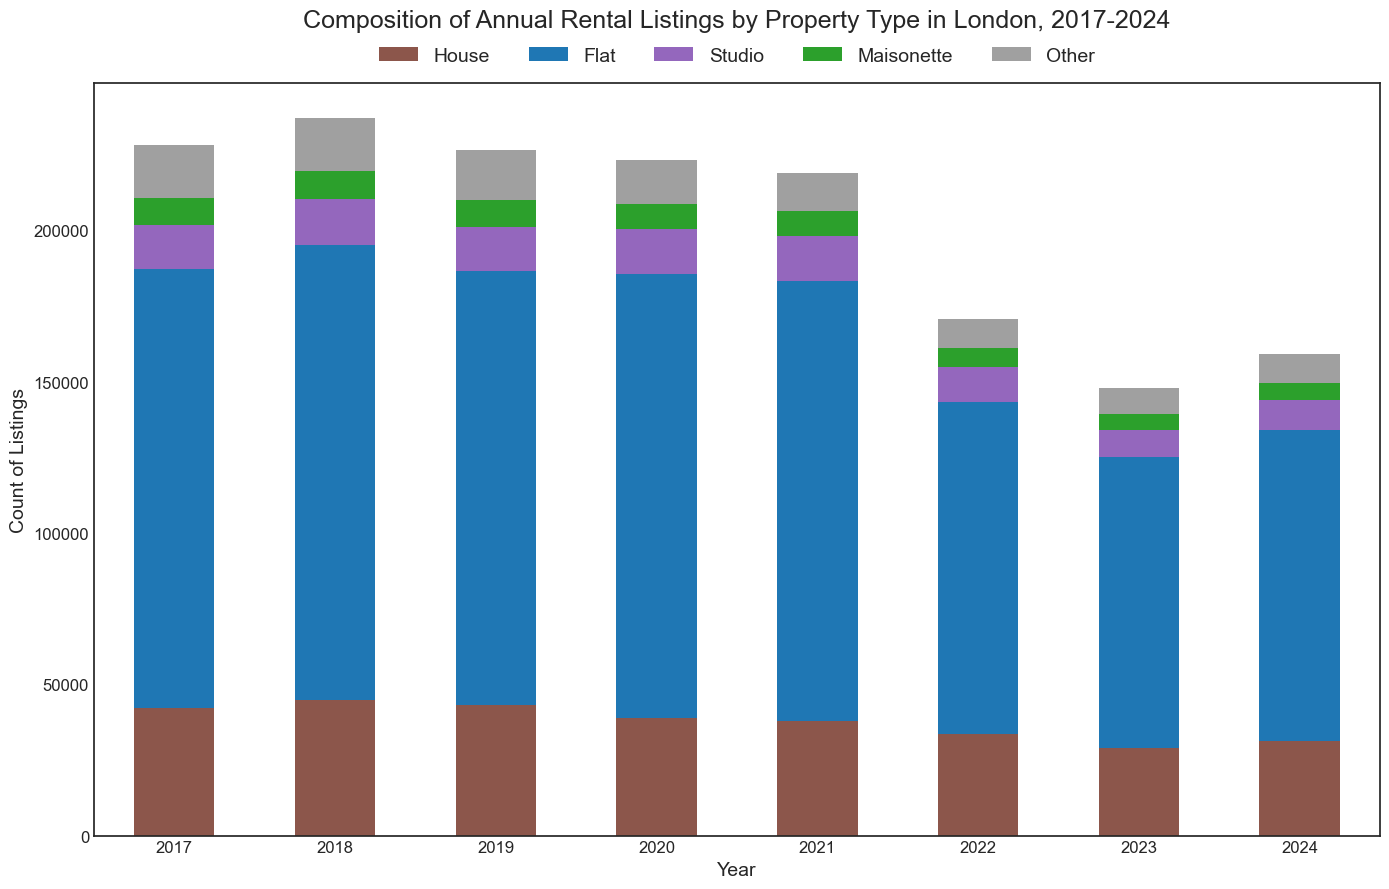

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Your data processing function 'categorize_property' remains the same)
def categorize_property(prop_type):
    # ... (function code) ...
    house_types = [
        'Terraced house', 'Semi-detached house', 'End terrace house',
        'Detached house', 'Town house', 'Bungalow', 'Cottage', 'Mews house',
        'Detached bungalow', 'Semi-detached bungalow', 'Barn conversion',
        'Link-detached house', 'Terraced bungalow'
    ]
    if prop_type == 'Flat':
        return 'Flat'
    elif prop_type == 'Studio':
        return 'Studio'
    elif prop_type == 'Maisonette':
        return 'Maisonette'
    elif prop_type in house_types:
        return 'House'
    else:
        return 'Other'

# Assume 'df' is your pre-loaded DataFrame
df['property_category'] = df['property_type'].apply(categorize_property)
type_counts = df.groupby(['zoopla_year', 'property_category']).size().unstack(fill_value=0)
desired_order = ['House', 'Flat', 'Studio', 'Maisonette', 'Other']
existing_columns = [col for col in desired_order if col in type_counts.columns]
type_counts = type_counts[existing_columns]


# --- Plotting Section ---

# Use a style without a grid
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(14, 9))

# (House, Flat, Studio, Maisonette, Other)
custom_colors = ['#8c564b', '#1f77b4', '#9467bd', '#2ca02c', '#a0a0a0']

type_counts.plot(kind='bar', stacked=True, ax=ax, color=custom_colors)

# --- Axis and Title settings remain academic ---
ax.set_title('Composition of Annual Rental Listings by Property Type in London, 2017-2024', fontsize=18, pad=40)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count of Listings', fontsize=14)
ax.tick_params(axis='x', labelrotation=0)
ax.tick_params(axis='both', which='major', labelsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title=None, fontsize=14,
          loc='lower center', bbox_to_anchor=(0.5, 1.0),
          fancybox=True, shadow=False, ncol=len(type_counts.columns))

plt.tight_layout()
plt.show()

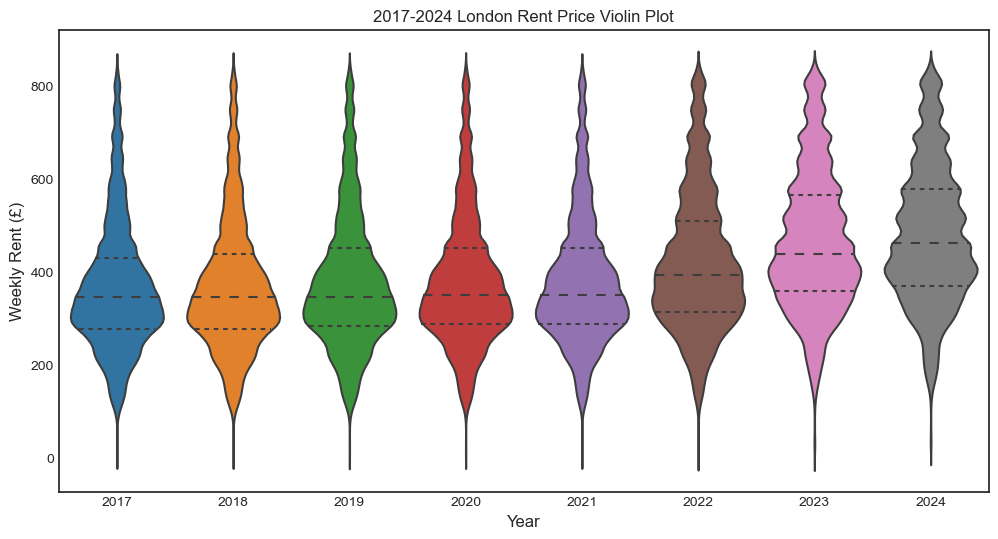

In [6]:
# C. Violin plot (distribution + quartiles) across years
year_color_map = {str(yr): palette[i] for i, yr in enumerate(years)}

plt.figure(figsize=(12, 6))
sns.violinplot(
    x=df_trim['zoopla_year'].astype(str),   # cast to str
    y='price_last',
    data=df_trim,
    inner='quartile',
    palette=year_color_map,
    scale='width'
)
plt.title("2017-2024 London Rent Price Violin Plot")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Weekly Rent (£)", fontsize=12)
plt.show()



C:\Users\cihshee\AppData\Local\Temp\ipykernel_33340\660286303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trim['price_bin'] = pd.cut(df_trim['price_last'], bins=bins, labels=labels, right=False)
C:\Users\cihshee\AppData\Local\Temp\ipykernel_33340\660286303.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat = df_trim.pivot_table(


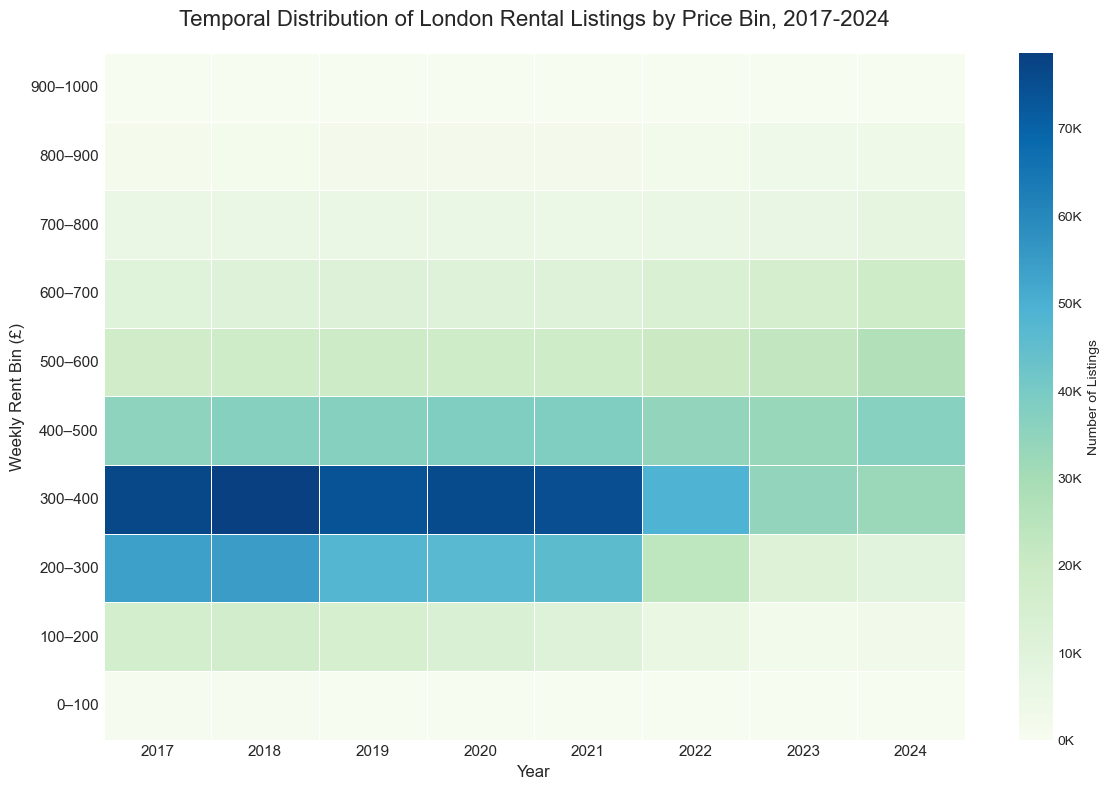

In [12]:
import matplotlib.ticker as ticker

# --- Plotting Section ---

plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(12, 8))

# D1. Create price bins
bins = list(range(0, 1100, 100))
labels = [f"{bins[i]}–{bins[i+1]}" for i in range(len(bins)-1)]
df_trim['price_bin'] = pd.cut(df_trim['price_last'], bins=bins, labels=labels, right=False)

# D2. Pivot table
heat = df_trim.pivot_table(
    index='price_bin', columns='zoopla_year',
    values='listing_id', aggfunc='count', fill_value=0
)

# Draw the heatmap and get the axes object
ax = sns.heatmap(
    heat, 
    cmap='GnBu', 
    cbar_kws={'label': 'Number of Listings'},
    linewidths=0.5, 
    linecolor='white'
)

# MODIFIED: Reverse the Y-axis to have low prices at the bottom
ax.invert_yaxis()

# MODIFIED: Format the color bar ticks to use 'K' for thousands
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

# --- Academic Titles and Labels ---
plt.title("Temporal Distribution of London Rental Listings by Price Bin, 2017-2024", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Weekly Rent Bin (£)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

## Time series


正在生成时间序列分解图...


C:\Users\cihshee\AppData\Local\Temp\ipykernel_69516\1031188052.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.98])


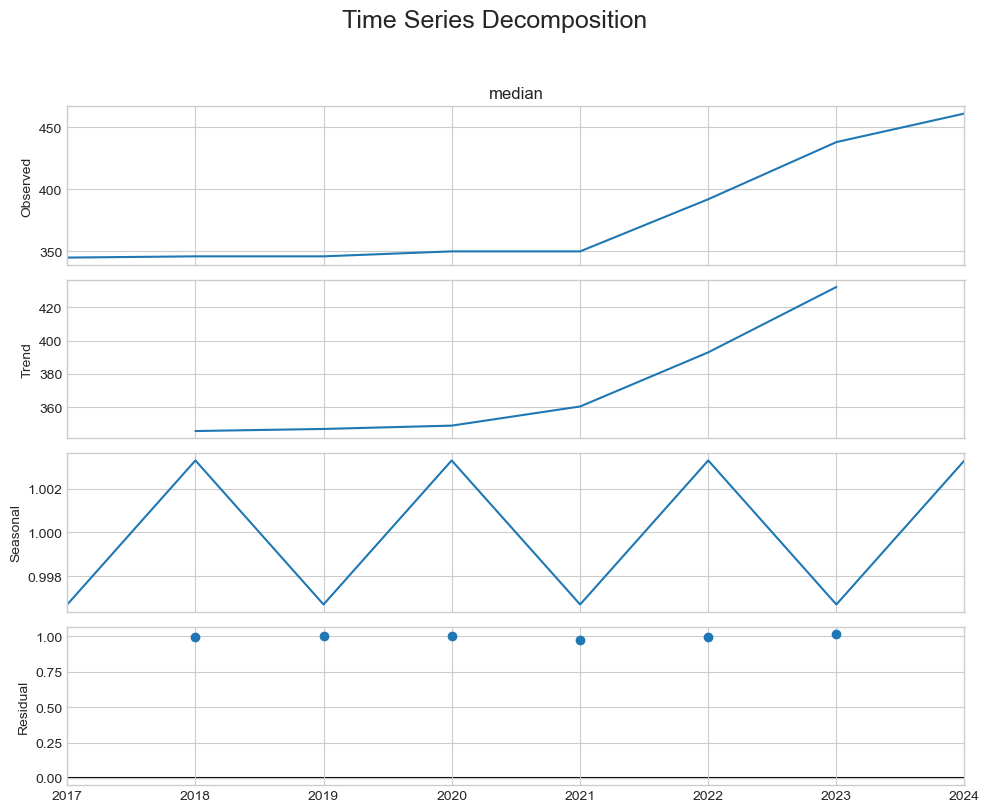

In [31]:
# --- 第二部分新增代码: 时间序列分解分析 ---

# 7. 准备时间序列数据
# 将'zoopla_year'转换为pandas的DatetimeIndex，这是时间序列分析的标准格式
# Set 'zoopla_year' as a DatetimeIndex, which is required for time series analysis
ts_data = summary_stats.set_index(pd.to_datetime(summary_stats['zoopla_year'], format='%Y'))['median']

# 8. 执行时间序列分解
# 由于波动随趋势放大（IQR范围变宽），使用'multiplicative'（乘法）模型更合适
# Because the fluctuations grow with the trend, a 'multiplicative' model is more appropriate
# period=2 是因为年度数据至少需要2个点才能计算趋势，对于年度数据，季节性无意义
# period=2 is the minimum for trend calculation with annual data; seasonality is not meaningful here
decomposition = seasonal_decompose(ts_data, model='multiplicative', period=2)

# 9. 绘制分解图
print("\n正在生成时间序列分解图...")
fig = decomposition.plot()
fig.set_size_inches(10, 8)
fig.suptitle('Time Series Decomposition', y=1.01, fontsize=18)

# 美化子图
ax_observed, ax_trend, ax_seasonal, ax_resid = fig.axes
ax_observed.set_ylabel('Observed')
ax_trend.set_ylabel('Trend')
ax_seasonal.set_ylabel('Seasonal')
ax_resid.set_ylabel('Residual')
for ax in fig.axes:
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('RENT_timeseries_decomposition.png', dpi=300)
plt.show()